In [1]:
import numpy as np
import os
import json
import sys
import matplotlib.pyplot as plt
import skimage

sys.path.append("../")
import src.plot as myplot
import seaborn as sns

import sklearn

In [2]:
import importlib
import src.plot as myplot
importlib.reload(myplot)

<module 'src.plot' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/mcm/paper_plots/../src/plot.py'>

In [3]:

import importlib
import src.paper_utils as utils
importlib.reload(utils)

<module 'src.paper_utils' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/mcm/paper_plots/../src/paper_utils.py'>

In [6]:
sample_sizes = [10, 100, 500,1000, 2000, 3000,4000,5000]
counts_samplesizes, mcms_samplesizes = utils.load_counts_mcm(sample_sizes, letter="", path_format="../data/Output/mcm/sample_sizes")


In [7]:
test_probs = np.load("./../data/OUTPUT/mcm/general_files/test_probs_all_MCM_all_dig_10runs.npy")


In [12]:
test_probs.shape

(10, 8, 10, 10, 892)

(9.228349180058468e-16, 5.187530438122954e-45)

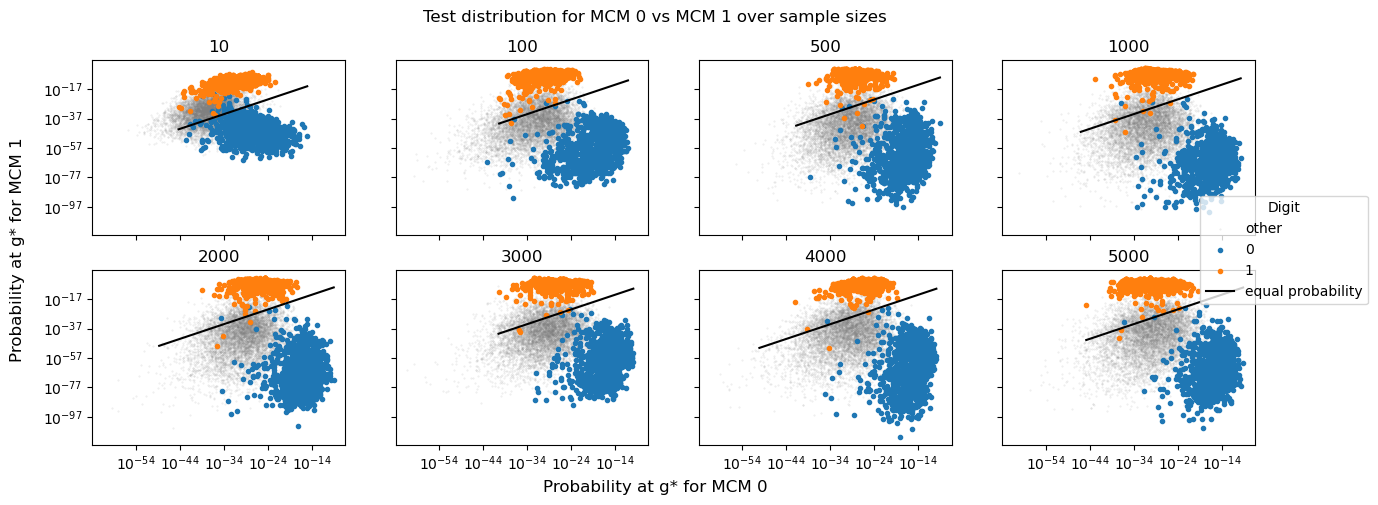

In [44]:
seedigit = 1
mcms = np.array([0,1])
not_mcms = np.setdiff1d(np.arange(10), mcms)




colors = myplot.get_list_fromcmap("tab10", N=10)
fig, axs = plt.subplots(2,len(sample_sizes)//2, figsize=(15,5),sharex=True, sharey=True)
axs = np.ravel(axs)
for ss_idx, sample_size in enumerate(sample_sizes):
    probs_mcms_digits = test_probs[:,ss_idx,0,:]
    ax = axs[ss_idx]
    

    ax.scatter(probs_mcms_digits[mcms[0],not_mcms],probs_mcms_digits[mcms[1],not_mcms], color = "grey", marker=".",s=.5, alpha = .2, label="other")
    for digit in mcms:
        ax.scatter(probs_mcms_digits[mcms[0],digit],probs_mcms_digits[mcms[1],digit], color=colors[digit], marker=".", alpha = 1, label=digit)

    max = np.min([np.max(probs_mcms_digits[mcms,dig]) for dig in mcms])
    min = np.max([np.min(probs_mcms_digits[mcms,dig]) for dig in mcms])
    ax.plot((min,max),(min,max),color="black", label="equal probability")



    ax.set_title(sample_size)

ax.set_xscale("log")
ax.set_yscale("log")
handles, labels = ax.get_legend_handles_labels()
leg = fig.legend(handles, labels, loc='center right', ncol=1,bbox_to_anchor=(.98,0.5)) #bbox_to_anchor=(.95,0.5)
leg.set_title("Digit")

fig.supxlabel(f"Probability at g* for MCM {mcms[0]}")
fig.suptitle(f"Test distribution for MCM 0 vs MCM 1 over sample sizes")

supylabel = fig.supylabel(f'Probability at g* for MCM {mcms[1]}')
supylabel.set_x(supylabel.get_position()[0] + 0.05)

plt.show()


